<a href="https://colab.research.google.com/github/hongwon2/Python-Practice/blob/main/RFM%EB%B6%84%EC%84%9D_3D_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
%load_ext google.colab.data_table

In [4]:
%%bigquery --project sql-recipe2 data
with
purchase_log as (
  select
    Customer_id,
    Sale,
    Order_Date,
  from
    `sql-recipe2.sample.sale_data`
)
, user_rfm as (
  select
    Customer_id,
    Max(Order_Date) as recent_date,
    date_diff(date('2019-01-01'), max(Order_Date),day) as recency,
    count(Order_Date) as frequency,
    sum(sale) as monetary
  from
    purchase_log
  group by
    Customer_id
)
,user_rfm_rank as (
  select
    customer_id,
    recent_date,
    recency,
    frequency,
    monetary,
    case
      when recency <100  then 5
      when recency < 300 then 4
      when recency < 600 then 3
      when recency < 1000 then 2
      else 1
    end as R,
    case
      when frequency >= 20 then 5
      when frequency >= 13 then 4
      when frequency >= 7 then 3
      when frequency >= 2 then 2
      when frequency = 1 then 1
    end as F,
    case
      when monetary >= 5000 then 5
      when monetary >= 2000 then 4
      when monetary >= 800 then 3
      when monetary >= 300 then 2
      else 1
    end as M
  from
    user_rfm
)
select *
from
  user_rfm_rank

In [5]:
data

,customer_id,recent_date,recency,frequency,monetary,R,F,M
0,HW-14935,2018-09-04,119,15,2941,4,4,4
1,AG-10900,2018-09-25,98,21,5494,5,5,5
2,DH-13675,2016-11-15,777,11,1706,2,3,3
3,BD-11725,2018-09-28,95,9,323,5,3,2
4,DP-13390,2018-01-06,360,14,2099,3,4,4
...,...,...,...,...,...,...,...,...
788,PB-19210,2017-02-11,689,2,108,2,2,1
789,CS-12130,2017-08-28,491,5,1062,3,2,3
790,BD-11560,2018-03-27,280,4,1781,4,2,3
791,CH-12070,2017-02-08,692,4,388,2,2,2


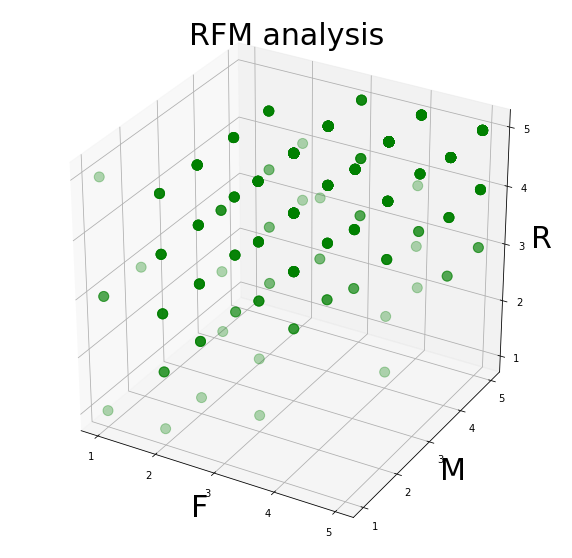

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection = '3d')
X = data['F']
Y = data['M']
Z = data['R']

scatter = ax.scatter(X,Y,Z, marker='o',c = 'green', s=100,alpha = 0.3)
ax.set_xlabel('F',size = 30)
ax.set_ylabel('M',size = 30)
ax.set_zlabel('R',size = 30)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([1, 2, 3, 4, 5])
ax.set_title('RFM analysis', size = 30)
ax.view_init(30,) 
plt.show()
fig.colorbar(scatter)


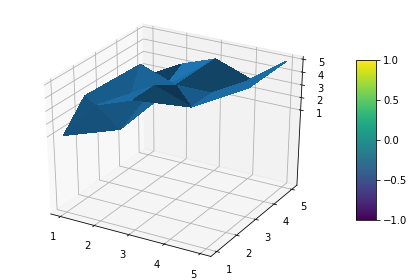

In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = data['F']
Y = data['M']
Z = data['R']

surf = ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)
ax.set_zlim(-5, 5)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([1, 2, 3, 4, 5])

fig.colorbar(surf, shrink=0.6, aspect=8)
surf.set_clim(-1.0, 1.0)
plt.tight_layout()
plt.show()